## Infraestrutura

1- Você está rodando em Python 3.9+

2- Você está usando um ambiente virtual: Virtualenv ou Anaconda

3- Todas as bibliotecas usadas nesse exercícios estão instaladas em um ambiente virtual específico

4- Gere um arquivo de requerimentos (requirements.txt) com os pacotes necessários. É necessário se certificar que a versão do pacote está disponibilizada.

5- Tire um printscreen do ambiente que será usado rodando em sua máquina.
![Infra](conda_infra_pd.jpg)

6- Disponibilize os códigos gerados, assim como os artefatos acessórios (requirements.txt) e instruções em um repositório GIT público. (se isso não for feito, o diretório com esses arquivos deverá ser enviado compactado no moodle).

https://github.com/FTNeves80/clusterizacao/blob/main/pd_validacao.ipynb

## Escolha de base de dados

### Para as questões a seguir, usaremos uma base de dados e faremos a análise exploratória dos dados, antes da clusterização.

1.Escolha uma base de dados para realizar o trabalho. Essa base será usada em um problema de clusterização.

2.Escreva a justificativa para a escolha de dados, dando sua motivação e objetivos.

3.Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?

4.Realize o pré-processamento adequado dos dados. Descreva os passos necessários.


In [9]:
#PARTE 2.1

import os
import kagglehub
import pandas as pd

# Baixa dataset e retorna o diretório local
path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")
print("Arquivos salvos em:", path)
print(os.listdir(path))

# Escolhe o CSV principal
csvs = [f for f in os.listdir(path) if f.lower().endswith(".csv")]
file = "Country-data.csv" if "Country-data.csv" in csvs else csvs[0]

# Carrega com pandas
df = pd.read_csv(os.path.join(path, file))


Arquivos salvos em: C:\Users\Dell\.cache\kagglehub\datasets\rohan0301\unsupervised-learning-on-country-data\versions\2
['Country-data.csv', 'data-dictionary.csv']


In [10]:
df.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [11]:
# Seleçao de colunas para o PD de Validação
df = df[['country','child_mort', 'health', 'life_expec']]

In [12]:
print("Dimensão:", df.shape)
print("###################")
df.info()

Dimensão: (167, 4)
###################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   health      167 non-null    float64
 3   life_expec  167 non-null    float64
dtypes: float64(3), object(1)
memory usage: 5.3+ KB


In [13]:
#PARTE 2.2 
total_paises_distintos = df['country'].nunique()

print("Total de Países distintos:", total_paises_distintos)
#Países distintos: 167

Total de Países distintos: 167


,min,25%,50%,75%,max,mean,std,range,iqr
child_mort,2.60,8.25,19.30,62.1,208.0,38.270060,40.328931,205.40,53.85
life_expec,32.10,65.30,73.10,76.8,82.8,70.555689,8.893172,50.70,11.50
health,1.81,4.92,6.32,8.6,17.9,6.815689,2.746837,16.09,3.68


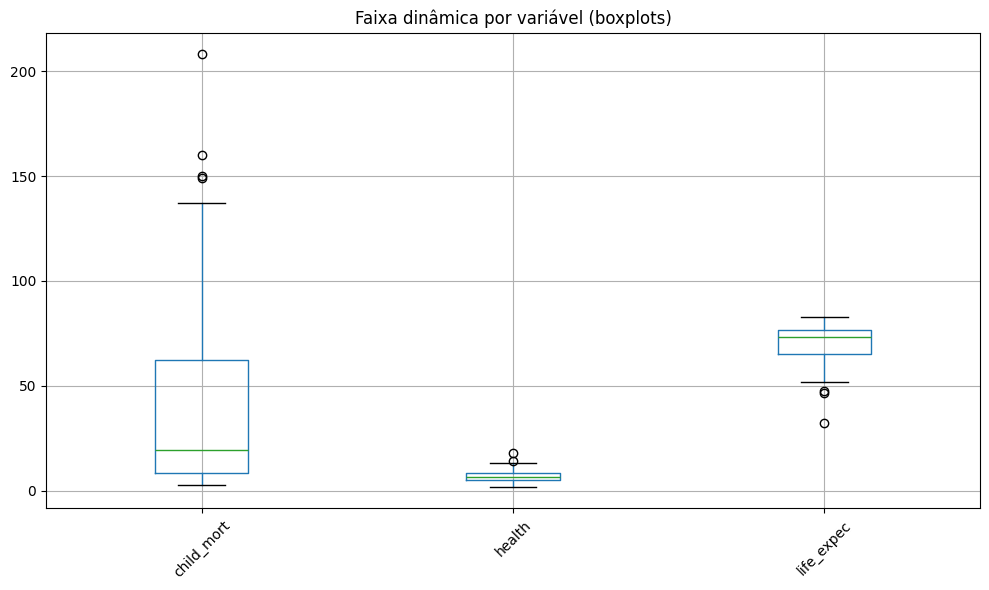

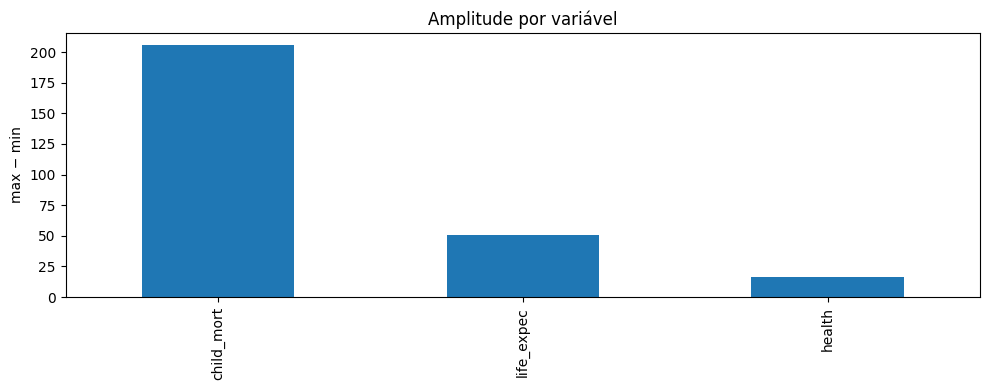

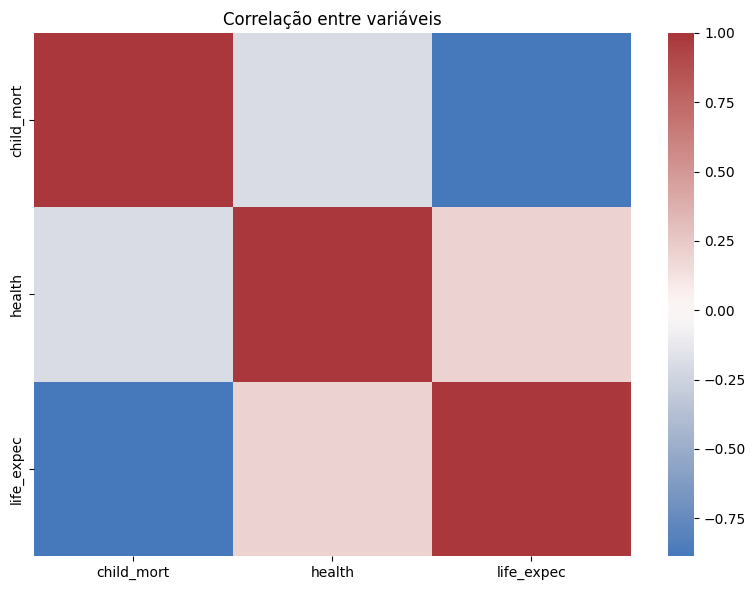

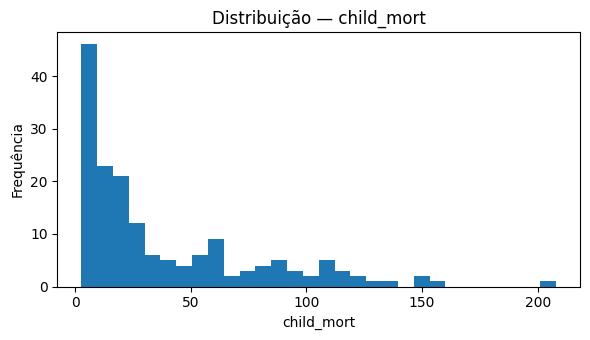

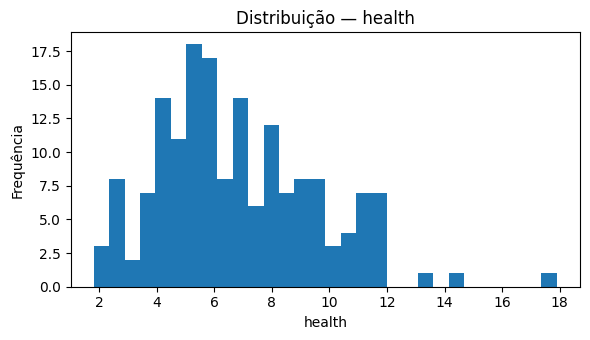

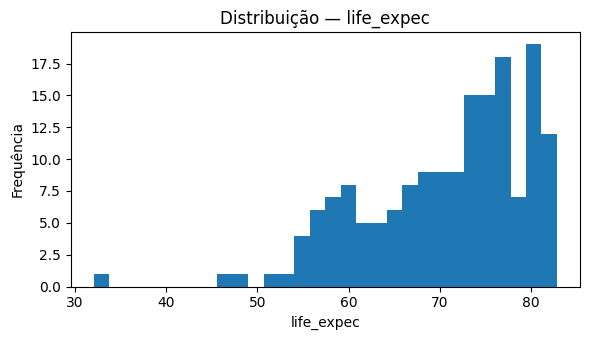

In [14]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

#Seleciona apenas numéricas 
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Estatísticas + amplitude
stats = df[num_cols].describe().T
stats["range"] = stats["max"] - stats["min"]
stats["iqr"]   = stats["75%"] - stats["25%"]
display(stats[["min","25%","50%","75%","max","mean","std","range","iqr"]].sort_values("range", ascending=False))

# Boxplots
plt.figure(figsize=(10,6))
df[num_cols].boxplot(rot=45)
plt.title("Faixa dinâmica por variável (boxplots)")
plt.tight_layout(); plt.show()

# Amplitude (max - min)
(df[num_cols].max() - df[num_cols].min()).sort_values(ascending=False).plot(kind="bar", figsize=(10,4))
plt.title("Amplitude por variável"); plt.ylabel("max − min"); plt.tight_layout(); plt.show()


# Correlação
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), cmap="vlag", center=0, annot=False)
plt.title("Correlação entre variáveis"); plt.tight_layout(); plt.show()

# Histogramas
for col in num_cols:
    plt.figure(figsize=(6,3.5))
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f"Distribuição — {col}"); plt.xlabel(col); plt.ylabel("Frequência"); plt.tight_layout(); plt.show()



## Clusterização

1.Realizar o agrupamento dos dados, escolhendo o número ótimo de clusters. Para tal, use o índice de silhueta e as técnicas: K-Médias  DBScan

2.Com os resultados em mão, descreva o processo de mensuração do índice de silhueta. Mostre o gráfico e justifique o número de clusters escolhidos.

3.Compare os dois resultados, aponte as semelhanças e diferenças e interprete.

4.Escolha mais duas medidas de validação para comparar com o índice de silhueta e analise os resultados encontrados. Observe, para a escolha, medidas adequadas aos algoritmos.

5.Realizando a análise, responda: A silhueta é um o índice indicado para escolher o número de clusters para o algoritmo de DBScan?


## Medidas de similaridade

1.Um determinado problema, apresenta 10 séries temporais distintas. Gostaríamos de agrupá-las em 3 grupos, de acordo com um critério de similaridade, baseado no valor máximo de correlação cruzada entre elas. Descreva em tópicos todos os passos necessários.

2.Para o problema da questão anterior, indique qual algoritmo de clusterização você usaria. Justifique.

3.Indique um caso de uso para essa solução projetada.

4.Sugira outra estratégia para medir a similaridade entre séries temporais. Descreva em tópicos os passos necessários.

